**DATOS BASE**

Descargamos del [EFFIS](https://forest-fire.emergency.copernicus.eu/) (European Forest Fire Information System) la superficie quemada en formato shapefile:
- [Burn Areas database](https://maps.effis.emergency.copernicus.eu/effis?service=WFS&request=getfeature&typename=ms:modis.ba.poly&version=1.1.0&outputformat=SHAPEZIP)

Descargamos de eurostat ([GISCO](https://ec.europa.eu/eurostat/web/gisco/overview)) un shapefile para obtener el nombre en inglés de los países y sus códigos internacionales:
- [Countries](https://ec.europa.eu/eurostat/web/gisco/geodata/administrative-units/countries)

In [1]:
import datetime as dt
import geopandas as gpd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargamos el shapefile de EFFIS con geopandas

windows = r'C:\Users\Usuario\Downloads\effis_layer\modis.ba.poly.shp'
linux = '~/Descargas/effis_layer/modis.ba.poly.shp'

shp_effis = gpd.read_file(windows)
shp_effis.head()

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pyogrio\raw.py:198: RuntimeWarning: C:\Users\Usuario\Downloads\effis_layer\modis.ba.poly.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


,id,FIREDATE,LASTUPDATE,COUNTRY,PROVINCE,COMMUNE,AREA_HA,BROADLEA,CONIFER,MIXED,SCLEROPH,TRANSIT,OTHERNATLC,AGRIAREAS,ARTIFSURF,OTHERLC,PERCNA2K,CLASS,geometry
0,2,2016-08-28 00:00:00,2022-01-26 11:57:54.973474,AL,Korcë,Konispol,67,0,0,0,19.402985074597908,16.417910447736688,10.447761194014257,53.731343283501886,0,0,0,FireSeason,"POLYGON ((20.18901 39.74908, 20.18909 39.75006..."
1,51,2016-05-06 00:00:00,2022-01-26 11:57:54.973474,TR,Mardin,N.A.,171,51.724137931004755,0,0,0,42.52873563215947,5.747126436778307,0,0,0,0,FireSeason,"POLYGON ((41.55879 37.29378, 41.55996 37.29843..."
2,888,2016-08-08 00:00:00,2022-01-26 11:57:54.973474,PT,Área Metropolitana do Porto,Covelo de Paivó e Janarde,26593,0.6020922706404734,0.2558892150222012,0.2220215247986746,0,56.893956498833234,38.661849928501404,3.2174305712350297,0.14675999096861542,0,9.843358251326316,FireSeason,"POLYGON ((-8.06251 40.84474, -8.06033 40.8436,..."
3,865,2016-10-25 00:00:00,2022-01-26 11:57:54.973474,EL,???????,?????? ????????? ???????,165,0,0,0,1.204819277107708,0,98.79518072283206,0,0,0,0,FireSeason,"POLYGON ((24.49178 35.25119, 24.49455 35.251, ..."
4,19,2016-08-11 00:00:00,2022-01-26 11:57:54.973474,PT,Tâmega e Sousa,Caçarilhe e Infesta,81,0,1.17647058823391,0,0,67.05882352933287,19.99999999997647,11.7647058823391,0,0,0,FireSeason,"POLYGON ((-8.05657 41.40623, -8.05945 41.4048,..."


In [4]:
# Comprobamos y vemos que todos los campos son strings: no se reconcen números ni fechas

shp_effis.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73885 entries, 0 to 73884
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          73885 non-null  object  
 1   FIREDATE    73885 non-null  object  
 2   LASTUPDATE  73885 non-null  object  
 3   COUNTRY     73883 non-null  object  
 4   PROVINCE    73885 non-null  object  
 5   COMMUNE     73885 non-null  object  
 6   AREA_HA     73885 non-null  object  
 7   BROADLEA    73154 non-null  object  
 8   CONIFER     73154 non-null  object  
 9   MIXED       73154 non-null  object  
 10  SCLEROPH    73154 non-null  object  
 11  TRANSIT     73154 non-null  object  
 12  OTHERNATLC  73154 non-null  object  
 13  AGRIAREAS   73154 non-null  object  
 14  ARTIFSURF   73154 non-null  object  
 15  OTHERLC     73154 non-null  object  
 16  PERCNA2K    73885 non-null  object  
 17  CLASS       73885 non-null  object  
 18  geometry    73885 non-null  geometry
d

**FILTRO DE PAÍSES UE Y ENTORNO**

In [5]:
# Países de nuestro shapefile

paises = shp_effis.COUNTRY.unique()
print(f'{len(paises)} países en total:\n\n{paises}')

52 países en total:

['AL' 'TR' 'PT' 'EL' 'IT' 'MA' 'BG' 'DZ' 'ES' 'BA' 'ME' 'HR' 'RS' 'RO'
 'FR' 'TN' 'MK' 'SY' 'KS' 'BE' 'SI' 'DE' 'UK' 'CY' 'SE' 'IE' 'PS' 'IL'
 'GE' 'CZ' 'DK' 'LY' 'LV' 'NO' 'FI' 'HU' 'LB' 'NL' 'PL' 'EE' 'CH' 'MT'
 'SK' 'LT' 'AT' 'UA' 'JO' 'EG' 'MD' None 'GB' 'GR']


In [7]:
# Cargamos shapefile con datos de todos los países del mundo

df_paises = gpd.read_file(r'C:\Users\Usuario\Downloads\GISCO_SHP\CNTR_RG_20M_2024_4326.shp')
df_paises.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CNTR_ID    260 non-null    object  
 1   CNTR_NAME  260 non-null    object  
 2   NAME_ENGL  260 non-null    object  
 3   NAME_FREN  241 non-null    object  
 4   ISO3_CODE  260 non-null    object  
 5   SVRG_UN    260 non-null    object  
 6   CAPT       233 non-null    object  
 7   EU_STAT    260 non-null    object  
 8   EFTA_STAT  260 non-null    object  
 9   CC_STAT    260 non-null    object  
 10  NAME_GERM  240 non-null    object  
 11  geometry   260 non-null    geometry
dtypes: geometry(1), object(11)
memory usage: 24.5+ KB


In [8]:
# Filtramos por los 27 + Suiza, Noruega, Reino Unido y países de los Balcanes
'''
Países UE:
https://european-union.europa.eu/principles-countries-history/eu-countries_es#header_countries_list

'''
eu_countries = [
    "Germany",
    "Austria",
    "Belgium",
    "Bulgaria",
    "Czechia",
    "Cyprus",
    "Croatia",
    "Denmark",
    "Slovakia",
    "Slovenia",
    "Spain",
    "Estonia",
    "Finland",
    "France",
    "Greece",
    "Hungary",
    "Ireland",
    "Italy",
    "Latvia",
    "Lithuania",
    "Luxembourg",
    "Malta",
    "Netherlands",
    "Poland",
    "Portugal",
    "Romania",
    "Sweden",
    'Switzerland',
    'Norway','United Kingdom',
    'North Macedonia', 'Serbia', 'Albania', 'Bosnia and Herzegovina', 'Montenegro', 'Kosovo'
]


def filtro_paises(paises:list):
    lista_codes = []
    for pais in paises:
        resultado = df_paises.loc[df_paises.NAME_ENGL == pais, 'CNTR_ID']
        code = resultado.values[0] if len(resultado) > 0 else print(f'No se encuentra {pais}')
        lista_codes.append(code)
    lista_codes.append('KS') # Código para Kosovo, podemos comprobarlo visualmente abriendo los shapes en un SIG

    return shp_effis[shp_effis.COUNTRY.isin(lista_codes)]

df_paises = df_paises[df_paises.NAME_ENGL.isin(eu_countries)]
effis_eu = filtro_paises(eu_countries)

No se encuentra Kosovo


In [9]:
# Creamos un nuevo campo para el código del país (COUNTRY_ID) y sustituimos el campo 'COUNTRY' con el nombre en inglés

def nombre_pais(country_codes):
    lista_paises = []
    for code in country_codes:
        resultado = df_paises.loc[df_paises.CNTR_ID == code, 'NAME_ENGL']
        pais = resultado.values[0] if len(resultado) > 0 else 'Kosovo'
        lista_paises.append(pais)

    return lista_paises

effis_eu['COUNTRY_ID'] = effis_eu.COUNTRY
effis_eu['COUNTRY'] = nombre_pais(effis_eu.COUNTRY)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


**CÁLCULO DEL CENTROIDE Y COORDENADAS**

In [10]:
# Reproyectamos capa, calculamos centroides y extraemos coordenadas

effis_eu = effis_eu.to_crs(4326)
effis_eu['LAT'], effis_eu['LON'] = effis_eu.centroid.y, effis_eu.centroid.x

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2416\3257089057.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  effis_eu['LAT'], effis_eu['LON'] = effis_eu.centroid.y, effis_eu.centroid.x


In [11]:
# Comprobamos longitud para las islas atlánticas

effis_eu[effis_eu.LON < -11].groupby('COUNTRY').PROVINCE.value_counts()

COUNTRY   PROVINCE                  
Portugal  Região Autónoma da Madeira    38
          Região Autónoma dos Açores     4
Spain     Tenerife                      15
          Gran Canaria                  10
          La Palma                       4
          La Gomera                      1
Name: count, dtype: int64

In [12]:
# Eliminamos islas menores y archipiélagos

effis_eu = effis_eu.loc[(effis_eu.LAT > 0) & (effis_eu.LON > -11), :]

**CONVERSIÓN FECHA Y CÁLCULO DURACIÓN Y DIAS JULIANOS**

In [13]:
# Pasamos las columnas de inicio de incendio y última actualización a datetime 
effis_eu.FIREDATE = pd.to_datetime(effis_eu.FIREDATE, format='ISO8601')
effis_eu.LASTUPDATE = pd.to_datetime(effis_eu.LASTUPDATE, format='ISO8601')

# Eliminamos los incendios de 2025
effis_eu = effis_eu[effis_eu.FIREDATE.dt.year < 2025]

# Calculamos la duración del incendio
effis_eu['DURATION'] = effis_eu.LASTUPDATE - effis_eu.FIREDATE

In [14]:
# Calculamos el día juliano pero como si todos los años fueran bisiestos

def dia_juliano_bisiesto(serie):
    dias_meses = [0,31,29,31,30,31,30,31,31,30,31,30]
    lista_dias = []
    for valor in serie:
        dia_juliano = 0
        mes = valor.month
        for index in range(mes):
            dia_juliano += dias_meses[index]
        dia_juliano += valor.day
        lista_dias.append(dia_juliano)
    return lista_dias

effis_eu['DAY_YEAR'] = dia_juliano_bisiesto(effis_eu.FIREDATE)

**CONVERSIÓN DE VARIABLES NUMÉRICAS**

In [15]:
effis_eu.AREA_HA = effis_eu.AREA_HA.astype(int)

# Las siguientes variables hacen referencia al tipo de superficie quemada
# expresada en porcentaje del área del incendio

var_float = ['BROADLEA', 'CONIFER', 'MIXED', 'SCLEROPH', 'TRANSIT',
       'OTHERNATLC', 'AGRIAREAS', 'ARTIFSURF', 'OTHERLC']

for variable in var_float:
    effis_eu[variable] = effis_eu[variable].astype(float)

effis_eu.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 41082 entries, 0 to 66209
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   id          41082 non-null  object         
 1   FIREDATE    41082 non-null  datetime64[ns] 
 2   LASTUPDATE  41082 non-null  datetime64[ns] 
 3   COUNTRY     41082 non-null  object         
 4   PROVINCE    41082 non-null  object         
 5   COMMUNE     41082 non-null  object         
 6   AREA_HA     41082 non-null  int64          
 7   BROADLEA    40762 non-null  float64        
 8   CONIFER     40762 non-null  float64        
 9   MIXED       40762 non-null  float64        
 10  SCLEROPH    40762 non-null  float64        
 11  TRANSIT     40762 non-null  float64        
 12  OTHERNATLC  40762 non-null  float64        
 13  AGRIAREAS   40762 non-null  float64        
 14  ARTIFSURF   40762 non-null  float64        
 15  OTHERLC     40762 non-null  float64        
 16  P

**FILTRO DE GRANDES INCENDIOS FORESTALES**

Porcentaje de grandes incendios en Europa: 	4.09 %
Porcentaje de superficie quemada por GIF: 	61.18 %


COUNTRY
Portugal                  264
Spain                     236
Bosnia and Herzegovina    189
Italy                     179
Romania                   158
Greece                    100
Montenegro                 97
Croatia                    76
North Macedonia            73
Albania                    68
France                     59
Bulgaria                   51
United Kingdom             41
Serbia                     32
Kosovo                     14
Cyprus                      8
Sweden                      8
Ireland                     7
Germany                     6
Hungary                     3
Latvia                      2
Norway                      2
Finland                     2
Netherlands                 1
Belgium                     1
Poland                      1
Slovenia                    1
Czechia                     1
Name: count, dtype: int64

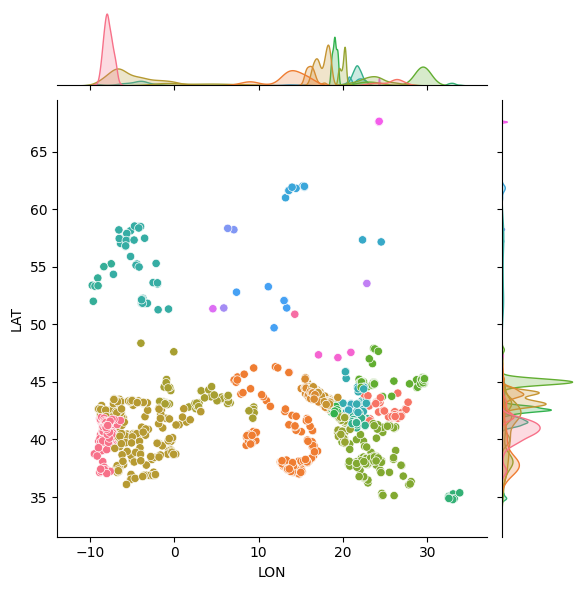

In [16]:
# Filtramos los grandes incendios forestales (GIFs), esto es, incendios a partir de 500 ha
# Guardamos en un dataframe nuevo y reservamos los datos de todos los incendios para comparar después

effis = effis_eu[effis_eu.AREA_HA > 499]

# Porcentaje de GIFs respecto número de incendios (más veremos la evolución de GIFs por países)
print(f'Porcentaje de grandes incendios en Europa: \t{round(effis.AREA_HA.count() / effis_eu.AREA_HA.count()*100, 2)} %')
print(f'Porcentaje de superficie quemada por GIF: \t{round(effis.AREA_HA.sum() / effis_eu.AREA_HA.sum()*100, 2)} %')

# Distribucion de GIFs por países seleccionados
sns.jointplot(effis, x='LON', y='LAT', hue = 'COUNTRY', legend=False);
effis.COUNTRY.value_counts()

**AGRUPACIÓN POR PAÍSES**

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


GIF_GROUP
Balkans       549
Portugal      264
Spain         236
Italy         179
Romania       158
Otros         146
Greece        100
British_Is     48
Name: count, dtype: int64

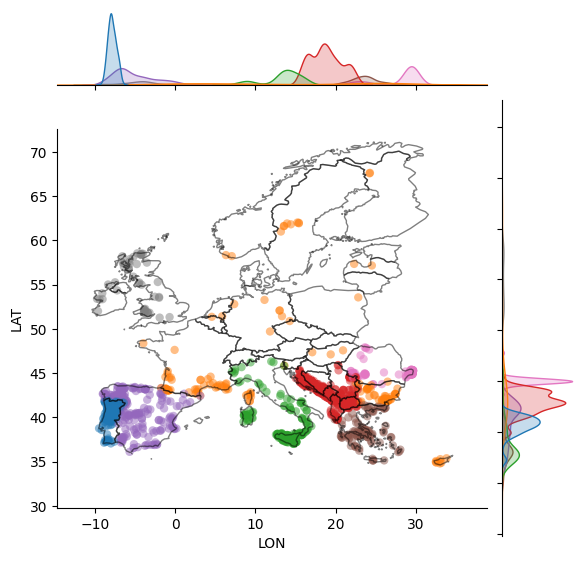

In [18]:
# Agrupamos los países para analizar más fácilmente los datos:

# Primero agrupamos los paises con menor número de incendios
seleccion = effis.COUNTRY.value_counts()
paises_min = seleccion[seleccion < 100].index

# Agrupamos los países de los Balcanes
balkans = ['North Macedonia', 'Serbia', 'Albania', 'Bosnia and Herzegovina', 'Montenegro', 'Kosovo', 'Croatia']

# Agrupamos las Islas Británicas
British_Is = ['United Kingdom','Ireland']

# Elimiamos los países redundantes de la lista 'paises_min' para evitar que los categorice como 'Otros'
pais_remove = []
for pais in paises_min:
    if (pais in balkans) or (pais in British_Is):
        pais_remove.append(pais)

paises_min = paises_min.drop(pais_remove)

# Creamos una nueva columna y renombramos los países
effis['GIF_GROUP'] = effis.COUNTRY.replace(paises_min, 'Otros')
effis['GIF_GROUP'] = effis.GIF_GROUP.replace(balkans, 'Balkans')
effis['GIF_GROUP'] = effis.GIF_GROUP.replace(British_Is, 'British_Is')

# Y echamos un vistazo a la distribución por países
g = sns.jointplot(effis, x='LON', y='LAT', hue = 'GIF_GROUP', edgecolor='none', legend=False, alpha=0.5)

# Ajustamos para agregar el mapa de los países de fondo
ax = g.ax_joint
zoom = 5
ax.set_xlim(effis.LON.min() - zoom, effis.LON.max() + zoom)
ax.set_ylim(effis.LAT.min() - zoom, effis.LAT.max() + zoom)

# Agregamos el shapefile directamente desde geopandas
df_paises.plot(ax=ax, color='none', edgecolor='k', alpha=0.5);
effis.GIF_GROUP.value_counts()

**AGRUPACIÓN POR PROVINCIA**

Con esta agrupación se pretende evitar las fronteras administrativas, focalizándose en las zonas concretas dónde se producen los grandes incendios.  
Aquí intentaremos responder a la pregunta ¿dónde se producen los grandes incendios?

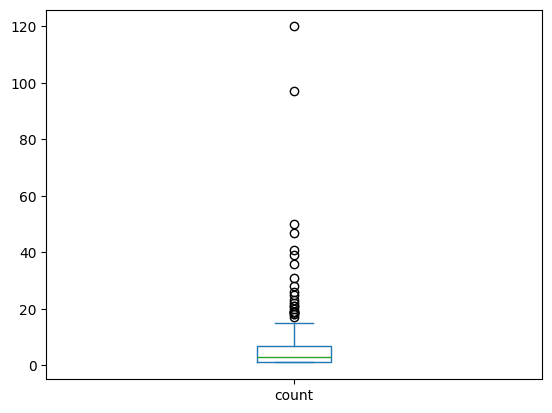

In [19]:
# Vistazo rápido a la distribución de número de incendios por zonas
# Comprobamos que las zonas más afectadas son los outliers de la distribución

effis.PROVINCE.value_counts().plot.box();

In [20]:
# Categorizamos las zonas por número de incendios: al haber una distribución tan grande (de 1 a >175) simplificamos usado una escala logarítmica
provincias = effis.PROVINCE.value_counts()

categorias = {}
for incendios, provincia in zip(provincias, provincias.index):
    categorias[provincia] = np.log(incendios).round().astype(int)

categorias

{'Tulcea': np.int64(5),
 '???? ????': np.int64(5),
 '???????': np.int64(4),
 'Beiras e Serra da Estrela': np.int64(4),
 '??????': np.int64(4),
 '???????????': np.int64(4),
 'Ourense': np.int64(4),
 'Palermo': np.int64(3),
 'Tâmega e Sousa': np.int64(3),
 'Glamo?': np.int64(3),
 '?????': np.int64(3),
 'Douro': np.int64(3),
 'Asturias': np.int64(3),
 'Alto Tâmega': np.int64(3),
 'N.A.': np.int64(3),
 '?ibensko-kninska ?upanija': np.int64(3),
 'Splitsko-dalmatinska ?upanija': np.int64(3),
 'Agrigento': np.int64(3),
 'Viseu Dão Lafões': np.int64(3),
 'Bosansko Grahovo': np.int64(3),
 'Alto Minho': np.int64(3),
 'Korcë': np.int64(3),
 'Pyrénées-Atlantiques': np.int64(3),
 '?????????': np.int64(3),
 'Trebinje': np.int64(3),
 'Nevesinje': np.int64(3),
 'Zadarska ?upanija': np.int64(3),
 'Ave': np.int64(3),
 'Médio Tejo': np.int64(3),
 'Terras de Trás-os-Montes': np.int64(3),
 'Reggio di Calabria': np.int64(2),
 'Bile?a': np.int64(2),
 'Zamora': np.int64(2),
 '????????': np.int64(2),
 'Mostar'

In [22]:
# Asignamos a cada incendio su categoría, creando para ello una nueva variable

for provincia, categoria in categorias.items():
    effis.loc[effis.PROVINCE == provincia, 'GIF_CAT'] = categoria

effis.GIF_CAT.value_counts()

GIF_CAT
2.0    513
3.0    447
5.0    217
4.0    213
1.0    205
0.0     85
Name: count, dtype: int64

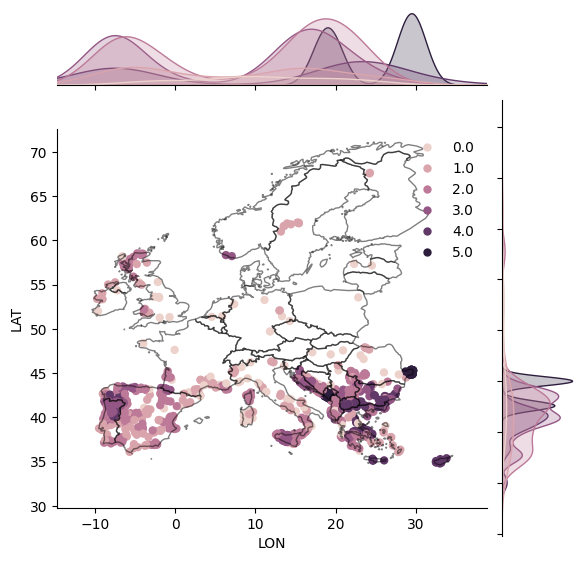

In [23]:
# Y echamos un vistazo a las 'zonas calientes'
g = sns.jointplot(effis, x='LON', y='LAT', hue = 'GIF_CAT', edgecolor='none', legend=True)

# Ajustamos para agregar el mapa de los países de fondo
ax = g.ax_joint
zoom = 5
ax.set_xlim(effis.LON.min() - zoom, effis.LON.max() + zoom)
ax.set_ylim(effis.LAT.min() - zoom, effis.LAT.max() + zoom)
ax.legend(labelspacing=0.5, frameon=False)

# Agregamos el shapefile directamente desde geopandas
df_paises.plot(ax=ax, color='none', edgecolor='k', alpha=0.5);

**DISTRIBUCIÓN EN EL TIEMPO**

En este apartado intentaremos responder a la pregunta ¿En qué época del año se producen los grandes incendios?

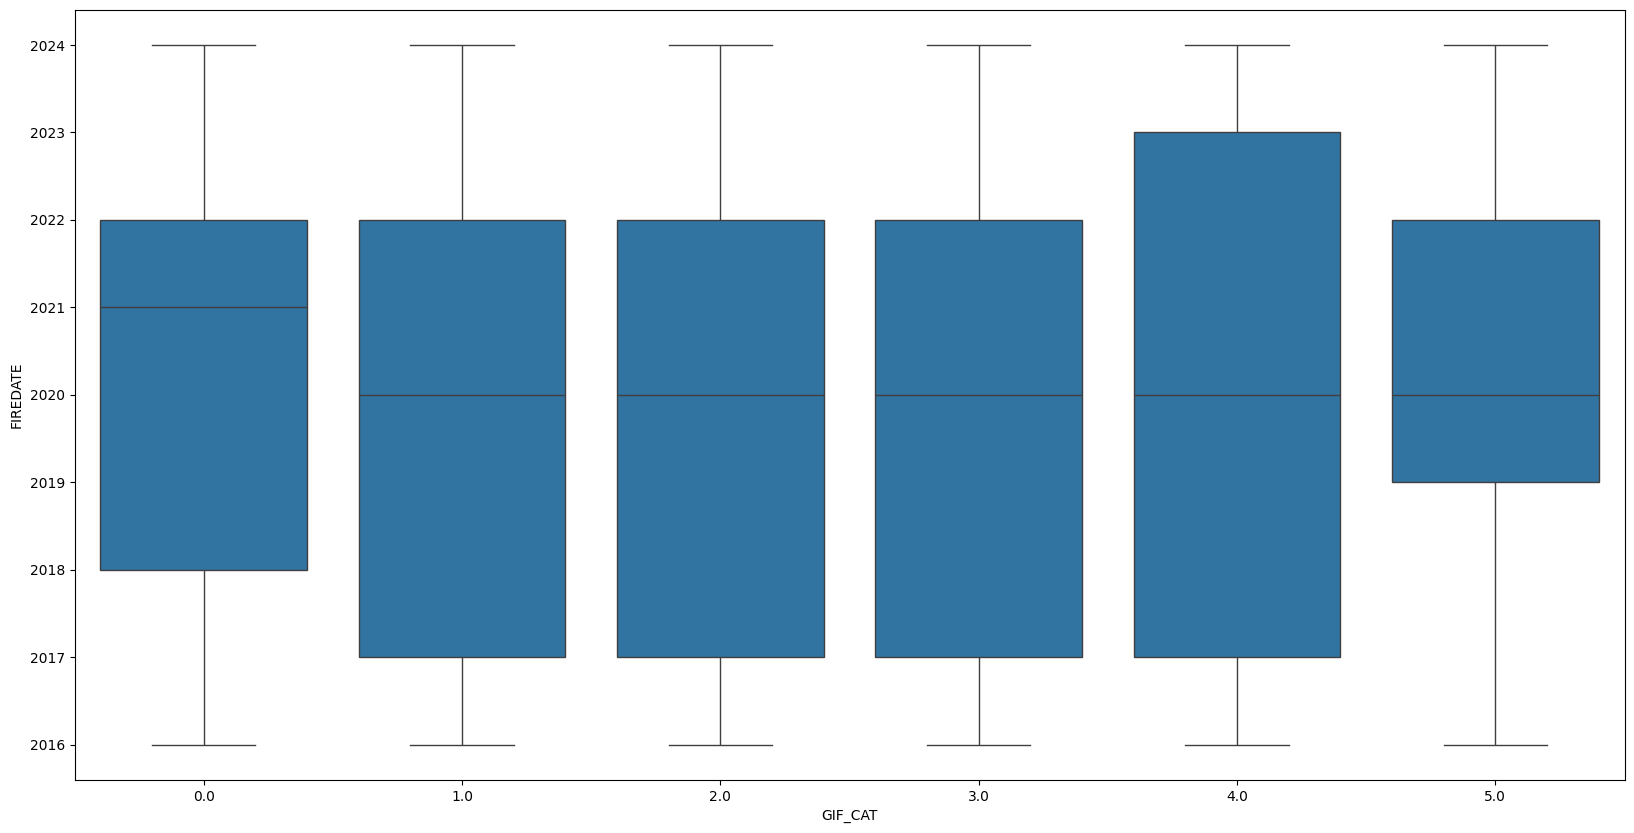

In [24]:
# Distribución por categorías (número de incendios). 
# Aquí vemos que los datos están demasiado agrupados (y las zonas parece no guardar ninguna relación entre ellas)

plt.figure(figsize=(20, 10))
sns.boxplot(effis, x='GIF_CAT', y=effis.FIREDATE.dt.year);

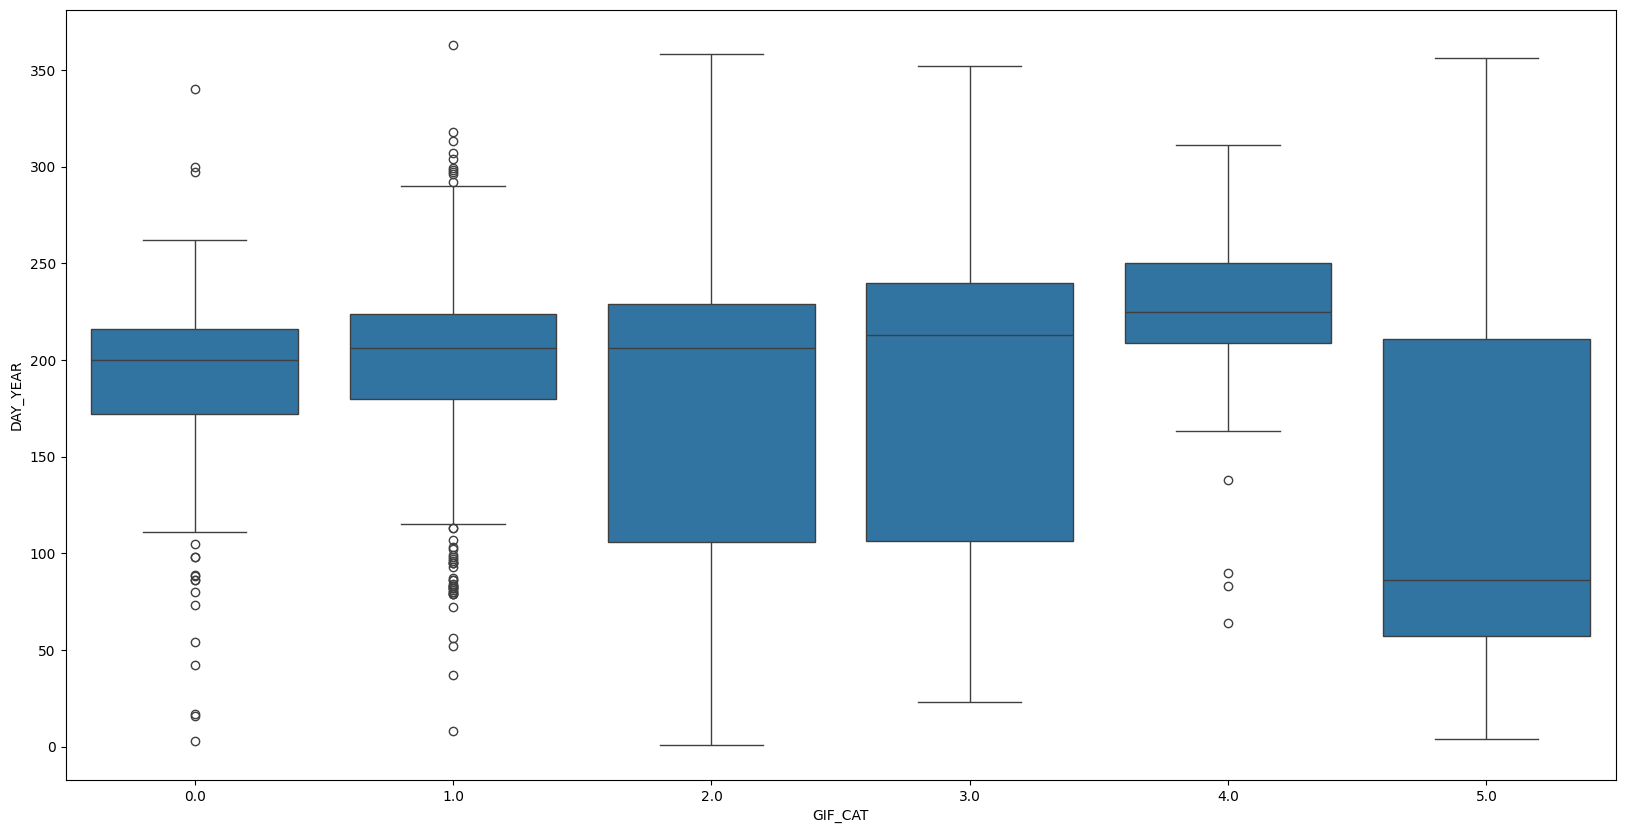

In [25]:
plt.figure(figsize=(20, 10))
sns.boxplot(effis, x='GIF_CAT', y='DAY_YEAR');

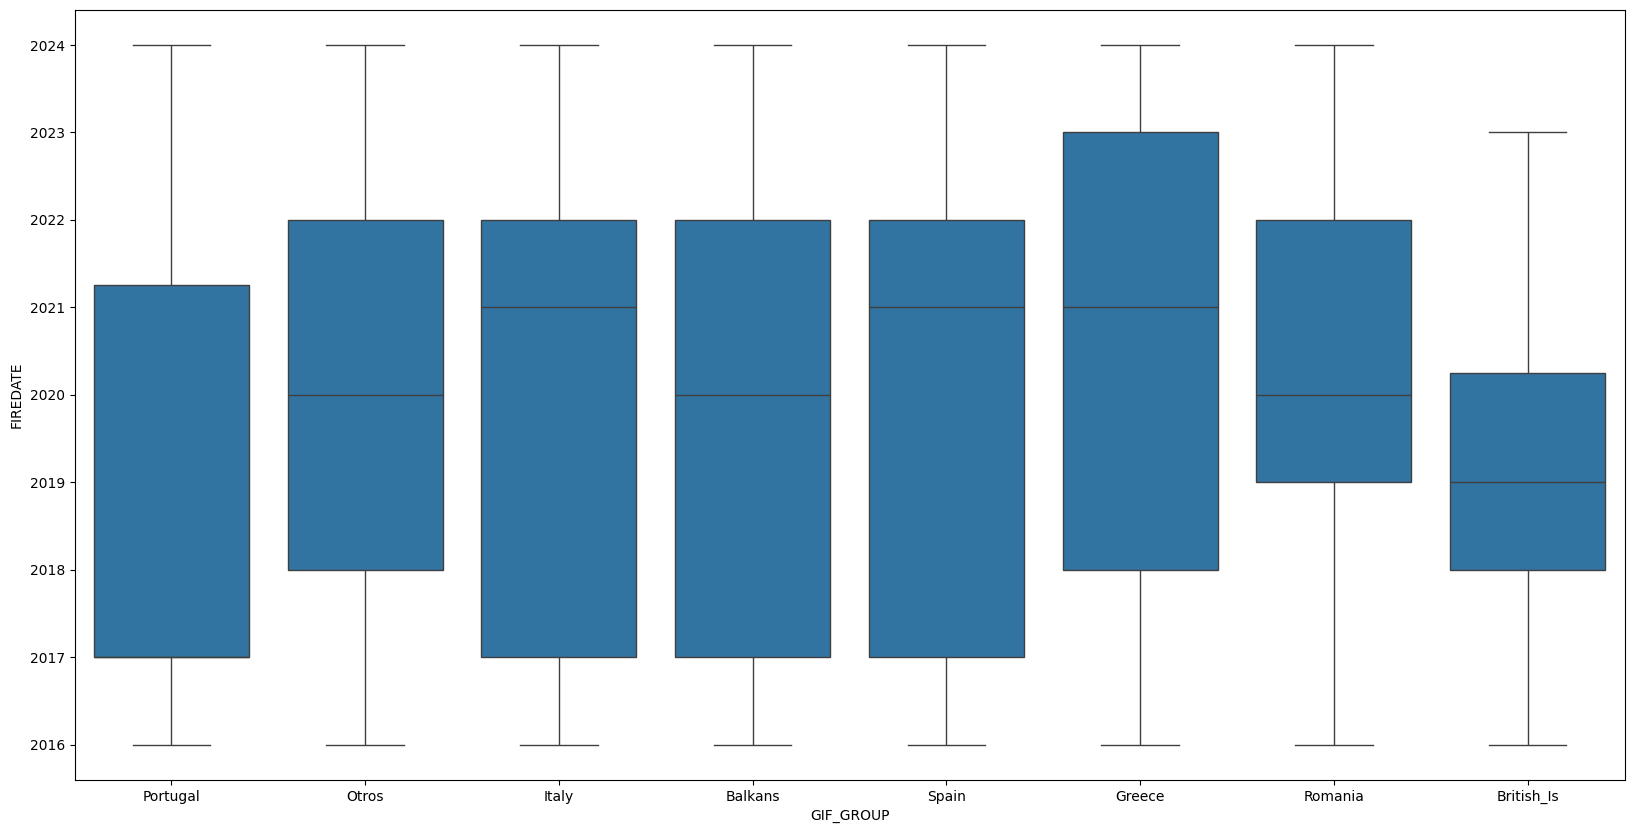

In [27]:
# Distribución por países. Aquí ya vemos por ejemplo que Rumanía tiene un 'problema' reciente, seguido de los Balcanes y las Islas Británicas 

plt.figure(figsize=(20, 10))
sns.boxplot(effis, x='GIF_GROUP', y=effis.FIREDATE.dt.year);

In [158]:
# Veamos ahora como ha evolucionado el porcentaje de grandes incendios por año

# Primero repetimos categorización en el dataframe con todos los incendios
# Creamos una nueva columna y renombramos los países
effis_eu['GIF_GROUP'] = effis_eu.COUNTRY.replace(paises_min, 'Otros')
effis_eu['GIF_GROUP'] = effis_eu.GIF_GROUP.replace(balkans, 'Balkans')
effis_eu['GIF_GROUP'] = effis_eu.GIF_GROUP.replace(British_Is, 'British_Is')

In [168]:
effis.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1751 entries, 2 to 73093
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          1751 non-null   object  
 1   FIREDATE    1751 non-null   object  
 2   LASTUPDATE  1751 non-null   object  
 3   COUNTRY     1751 non-null   object  
 4   PROVINCE    1751 non-null   object  
 5   COMMUNE     1751 non-null   object  
 6   AREA_HA     1751 non-null   int64   
 7   BROADLEA    1750 non-null   object  
 8   CONIFER     1750 non-null   object  
 9   MIXED       1750 non-null   object  
 10  SCLEROPH    1750 non-null   object  
 11  TRANSIT     1750 non-null   object  
 12  OTHERNATLC  1750 non-null   object  
 13  AGRIAREAS   1750 non-null   object  
 14  ARTIFSURF   1750 non-null   object  
 15  OTHERLC     1750 non-null   object  
 16  PERCNA2K    1751 non-null   object  
 17  CLASS       1751 non-null   object  
 18  geometry    1751 non-null   geometry
 19  CO

In [ ]:
pd.pivot_table(effis, values='AREA_HA', index='GIF_GROUP', columns= effis.FIREDATE.dt.year, aggfunc='sum')

AttributeError: Can only use .dt accessor with datetimelike values

In [164]:
for pais, gif_pais, if_pais in zip(effis.GIF_GROUP.unique(), effis.GIF_GROUP.value_counts(), effis_eu.GIF_GROUP.value_counts()):
    print(f'{pais}:  \t{round(gif_pais / if_pais * 100, 2)} %')

Portugal:  	6.69 %
Otros:  	4.41 %
Italy:  	4.58 %
Balkans:  	5.42 %
Spain:  	5.36 %
Greece:  	7.29 %
Romania:  	5.55 %
British_Is:  	4.16 %


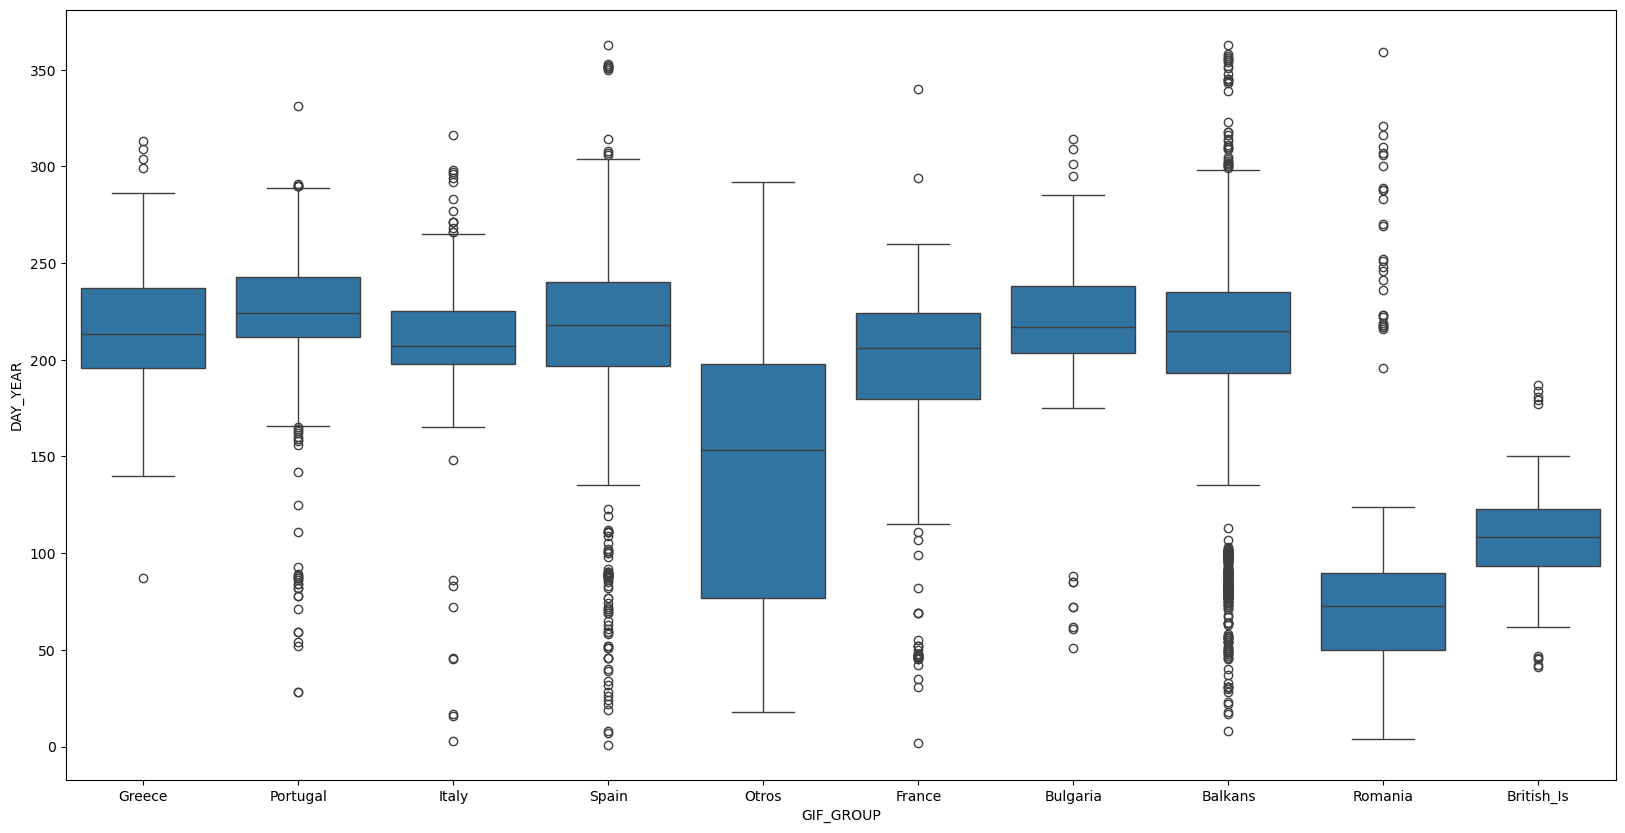

In [26]:
plt.figure(figsize=(20, 10))
sns.boxplot(effis, x='GIF_GROUP', y='DAY_YEAR');

In [27]:
# Vamos a intentar  delimitar  el período de primavera
# Para ello, usaremos de modelo  a Rumanía e Islas Britanicas  frente  al resto de países 
# (a salvedad del grupo 'Otros' que quedará al margen debido a su amplitud)

std_epoca = effis.groupby('GIF_GROUP')['DAY_YEAR'].describe()
std_epoca['IQR'] = std_epoca['75%'] - std_epoca['25%']
std_epoca.sort_values('25%')

,count,mean,std,min,25%,50%,75%,max,IQR
GIF_GROUP,,,,,,,,,
Romania,184.0,94.673913,76.900064,4.0,49.75,72.5,89.50,359.0,39.75
Otros,108.0,144.481481,63.729346,18.0,77.00,153.5,198.00,292.0,121.00
British_Is,94.0,108.734043,27.674054,41.0,93.25,108.5,122.75,187.0,29.50
France,128.0,179.546875,72.789510,2.0,179.75,206.0,224.00,340.0,44.25
Balkans,1064.0,194.067669,67.815359,8.0,193.00,215.0,235.00,363.0,42.00
Greece,300.0,215.506667,27.986678,87.0,195.75,213.5,237.00,313.0,41.25
Spain,690.0,209.614493,58.571300,1.0,197.00,218.0,240.00,363.0,43.00
Italy,430.0,209.623256,32.689005,3.0,198.00,207.0,225.00,316.0,27.00
Bulgaria,148.0,215.216216,42.298026,51.0,203.75,217.0,238.00,314.0,34.25


In [28]:
# Establecemos los límites del período de grandes incendios en verano en función de Portugal, 
# que es el que tiene la distribución más retrasada además de contar con el mayor número de grandes incendios

pais_verano = std_epoca[std_epoca.index == 'Portugal']
lim_verano = [round(pais_verano['25%'].iloc[0] - 1.25*pais_verano['IQR'].iloc[0]),round(pais_verano['75%'].iloc[0] + 1.25*pais_verano['IQR'].iloc[0])]

lim_verano

[173, 282]

In [29]:
# Ahora vamos a ver la distribución de incendios fuera del período estival que hemos definido
# Para ello consideraremos los días un continuo desde 'otoño' hasta nuestro 'verano'

effis_inv = effis[(effis.DAY_YEAR < lim_verano[0]) | (effis.DAY_YEAR > lim_verano[1])]

def anti_juliano(dia):
    anti_dia = dia - 360 if dia > lim_verano[1] else dia
    return anti_dia

effis_inv.DAY_YEAR = effis_inv.DAY_YEAR.apply(anti_juliano)

/usr/lib/python3.13/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,count,mean,std,min,25%,50%,75%,max,IQR
GIF_GROUP,,,,,,,,,
France,33.0,54.030303,39.948783,-66.0,46.0,48.0,69.00,170.0,23.00
British_Is,89.0,104.640449,22.136584,41.0,93.0,106.0,122.00,150.0,29.00
Romania,166.0,55.891566,37.790976,-77.0,46.0,61.0,82.75,124.0,36.75
Balkans,285.0,61.108772,47.223309,-74.0,51.0,81.0,90.00,135.0,39.00
Otros,66.0,98.515152,43.954257,-68.0,72.0,98.0,119.25,171.0,47.25
Bulgaria,13.0,21.538462,67.543338,-75.0,-51.0,61.0,72.00,88.0,123.00
Spain,169.0,47.846154,87.471900,-76.0,-57.0,69.0,111.00,172.0,168.00
Greece,18.0,98.166667,101.548163,-74.0,-13.5,159.0,168.00,172.0,181.50
Italy,23.0,54.565217,96.838115,-77.0,-53.0,46.0,166.50,172.0,219.50


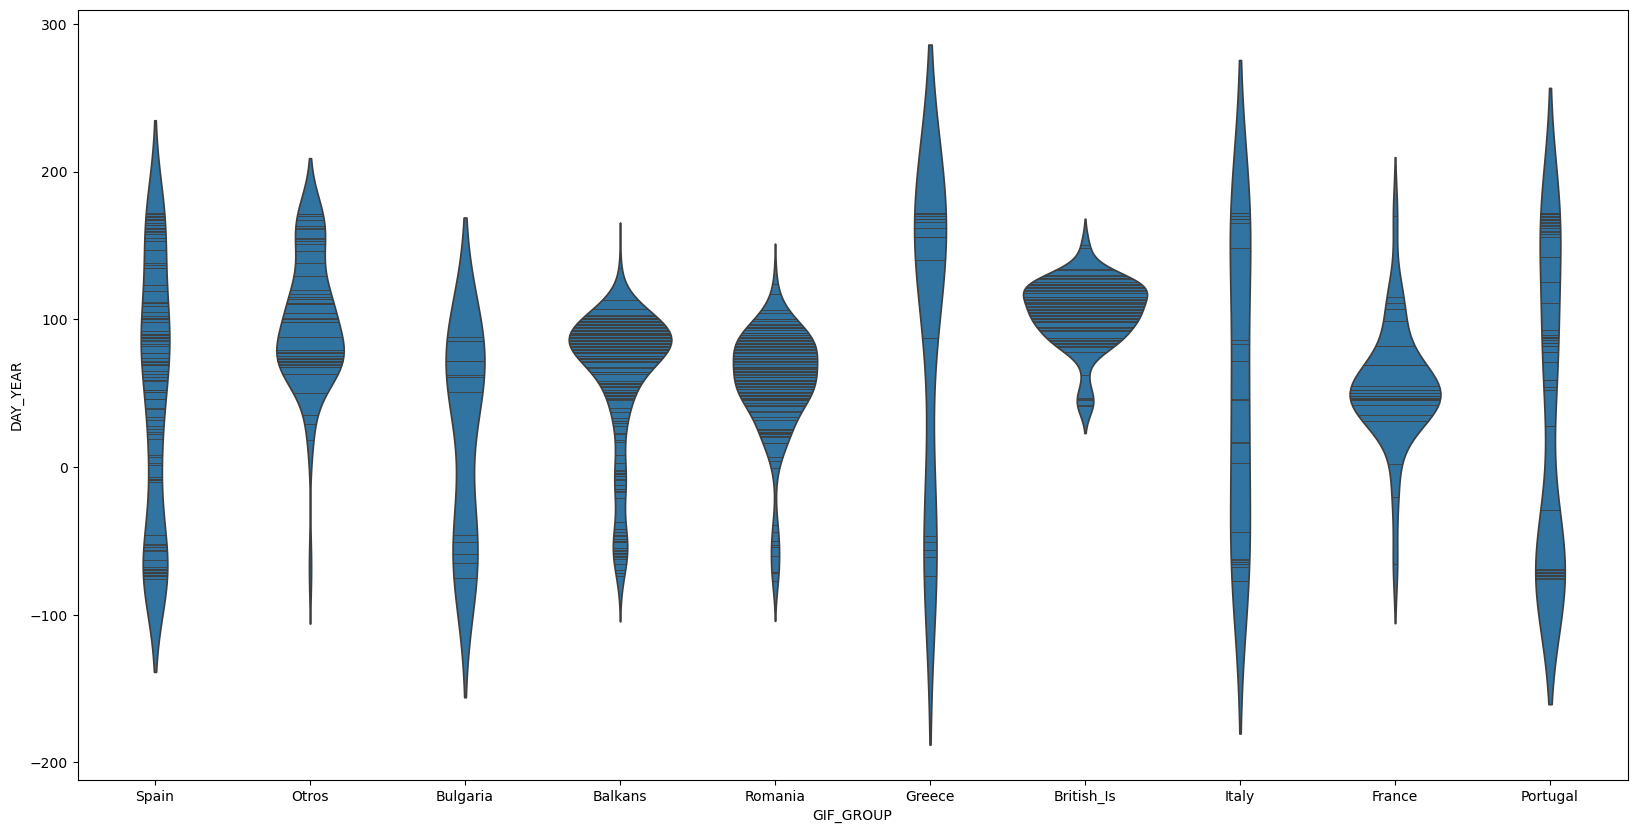

In [30]:
# En este caso, debido al menor numero de incendios y su distribución más homogénea en algunos casos, usaremos un diagrama de violin
# Podemos apreciar que los países de los Balcanes, Rumanía e Islas Británicas si tienen un período más marcado
# Además, son los países con mayor número de GIF en este período, salvo España y Portugal,
# los cuáles no tienen un período tan claro y sí un número mucho mayor de GIFs en general

plt.figure(figsize=(20, 10))
sns.violinplot(effis_inv, x='GIF_GROUP', y='DAY_YEAR', inner='sticks')
std_inv = effis_inv.groupby('GIF_GROUP')['DAY_YEAR'].describe()
std_inv['IQR'] = std_inv['75%'] - std_inv['25%']
std_inv.sort_values('IQR')

In [31]:
# Establecemos los límites del período de grandes incendios en invierno en función de Rumanía

pais_inv = std_epoca[std_epoca.index == 'Romania']
lim_inv = [round(pais_inv['25%'].iloc[0] - 1.25*pais_inv['IQR'].iloc[0]),round(pais_inv['75%'].iloc[0] + 1.25*pais_inv['IQR'].iloc[0])]

lim_inv

[0, 139]

In [32]:
# Comprobamos a qué días del calendario corresponden los días julianos calculados

def fecha_juliano(dia_juliano):
    dias_meses = [0,31,29,31,30,31,30,31,31,30,31,30]
    resto = dia_juliano
    for index, dias in enumerate(dias_meses):
        if resto - dias < 0:
            return f'{resto}/{index}'
            break
        resto = resto - dias

for string, dia in zip(['Inicio','Fin'],lim_verano):
    print(f'{string} verano:\t{fecha_juliano(dia)}')

for string, dia in zip(['Inicio','Fin'],lim_inv):
    print(f'{string} inv:\t{fecha_juliano(dia)}')

Inicio verano:	21/6
Fin verano:	8/10
Inicio inv:	0/1
Fin inv:	18/5


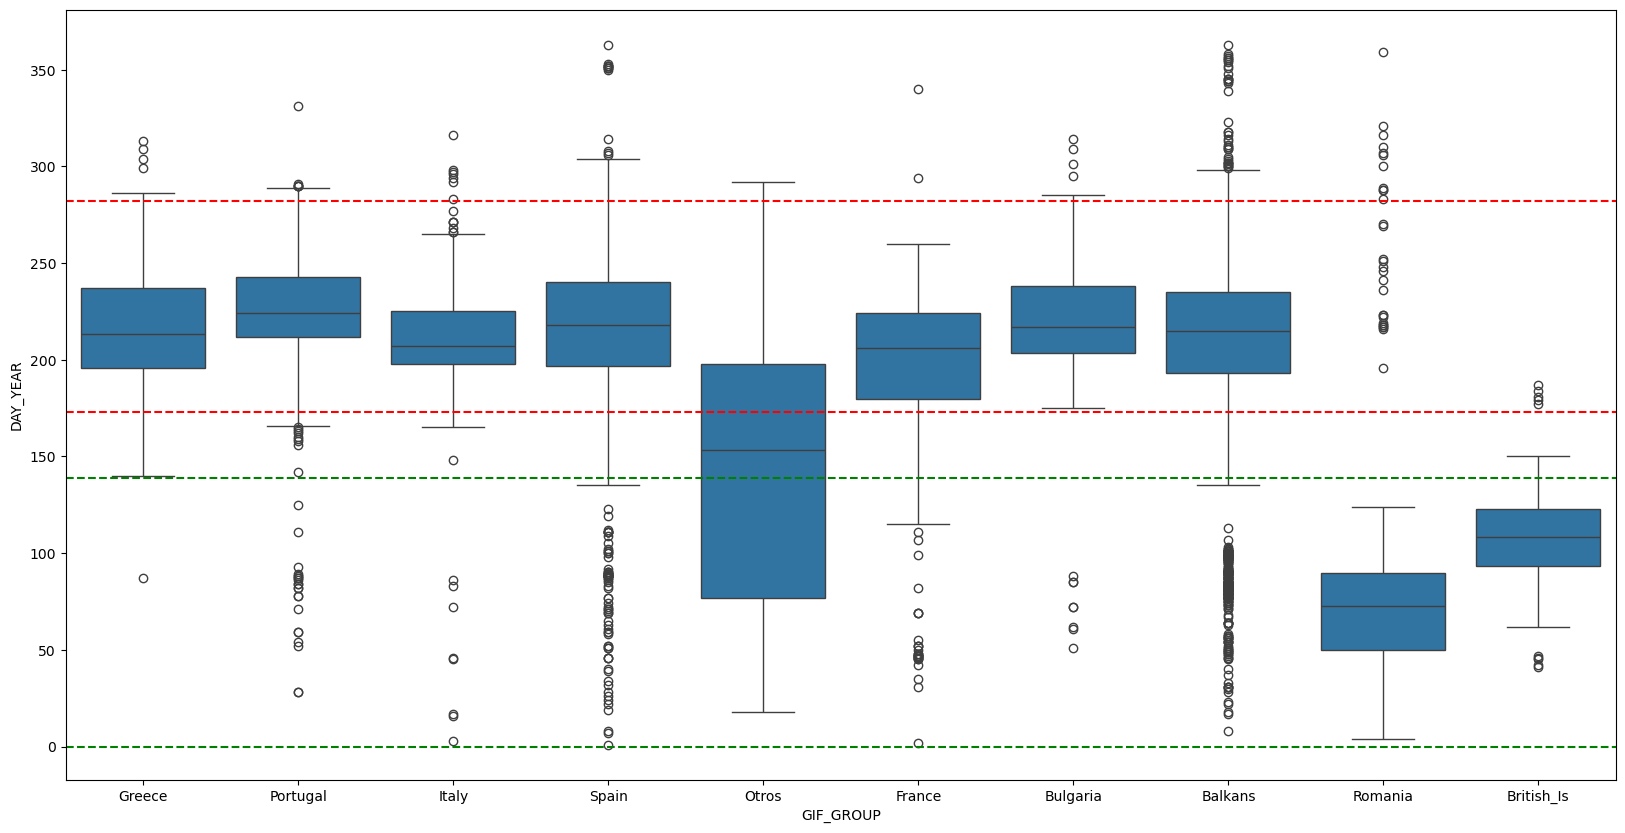

In [33]:
plt.figure(figsize=(20, 10))
sns.boxplot(effis, x='GIF_GROUP', y='DAY_YEAR')
plt.axhline(y=lim_verano[0], color='r', linestyle='--')
plt.axhline(y=lim_verano[1], color='r', linestyle='--')
plt.axhline(y=lim_inv[0], color='g', linestyle='--')
plt.axhline(y=lim_inv[1], color='g', linestyle='--');

**EVOLUCIÓN DEL PERÍODO DE INCENDIOS**  
Ahora comprobaremos si esta 'ventana' de grandes incenduios siempre ha sido la misma o ha ido cambiando.

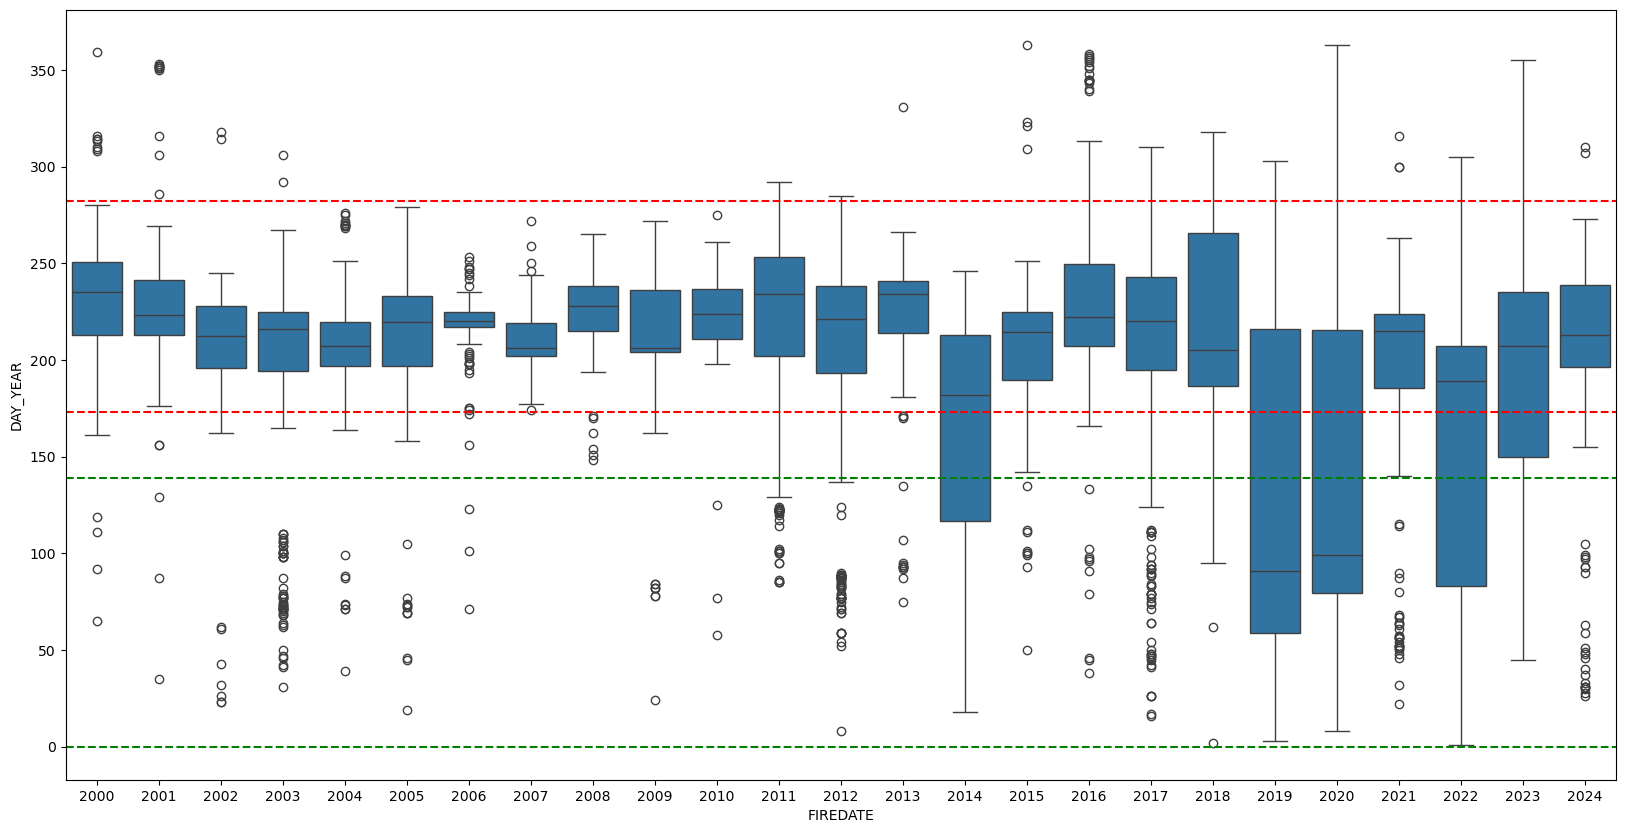

In [34]:
# Distribución de número de grandes incendios por día juliano para cada año
# Aquí podemos ver cómo la ventana de los grandes incendios se va ampliando hacia la primavera

plt.figure(figsize=(20, 10))
sns.boxplot(effis, x=effis.FIREDATE.dt.year, y=effis.DAY_YEAR)
plt.axhline(y=lim_verano[0], color='r', linestyle='--')
plt.axhline(y=lim_verano[1], color='r', linestyle='--')
plt.axhline(y=lim_inv[0], color='g', linestyle='--')
plt.axhline(y=lim_inv[1], color='g', linestyle='--');

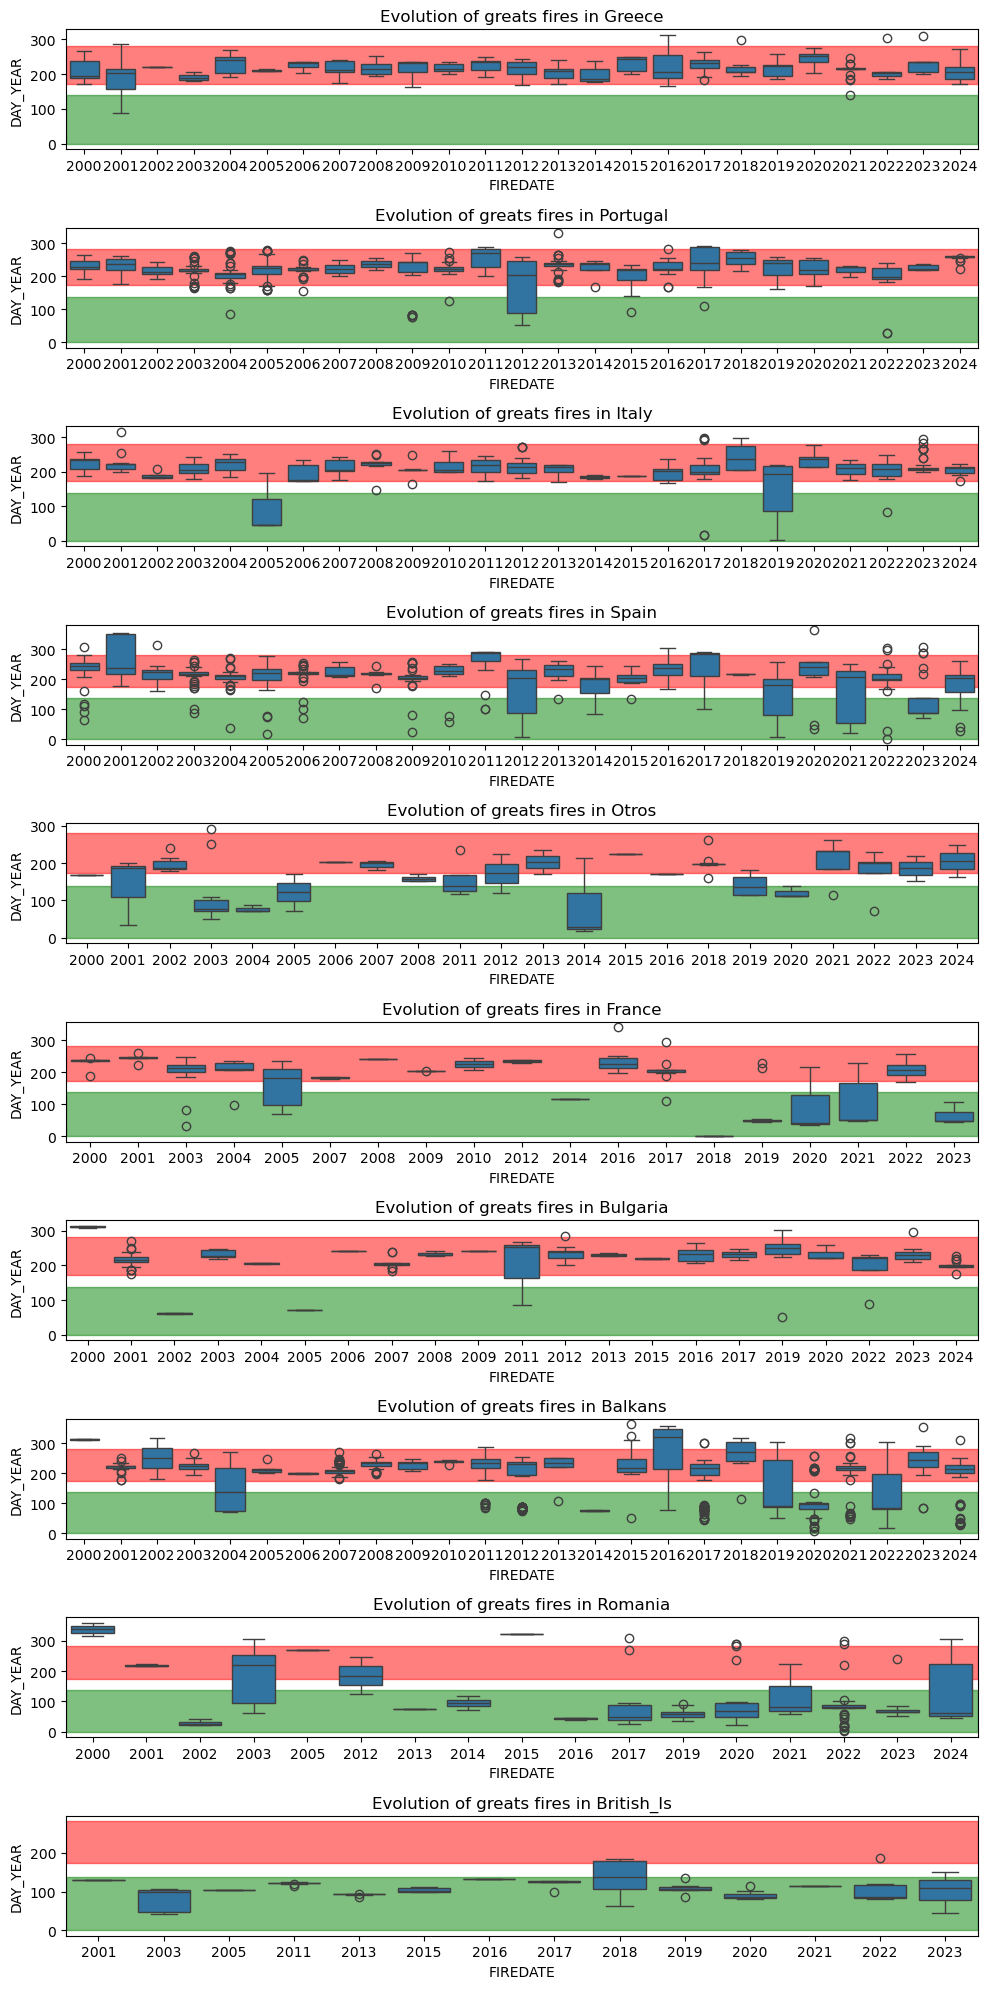

In [46]:
def pinta_catbox(df, cat):
    variables = df[cat].unique()
    fig, axs = plt.subplots(len(variables),1, figsize=(10,20))

    for index, variable in enumerate(variables):
        filtro = df[df[cat] == variable]
        sns.boxplot(filtro, x=filtro.FIREDATE.dt.year, y='DAY_YEAR', ax=axs[index])
        axs[index].axhspan(lim_verano[0], lim_verano[1], color='r', alpha=0.5)
        axs[index].axhspan(lim_inv[0], lim_inv[1], color='g', alpha=0.5)
        axs[index].set_title(f'Evolution of greats fires in {variable}')
    fig.tight_layout()

pinta_catbox(effis, 'GIF_GROUP')

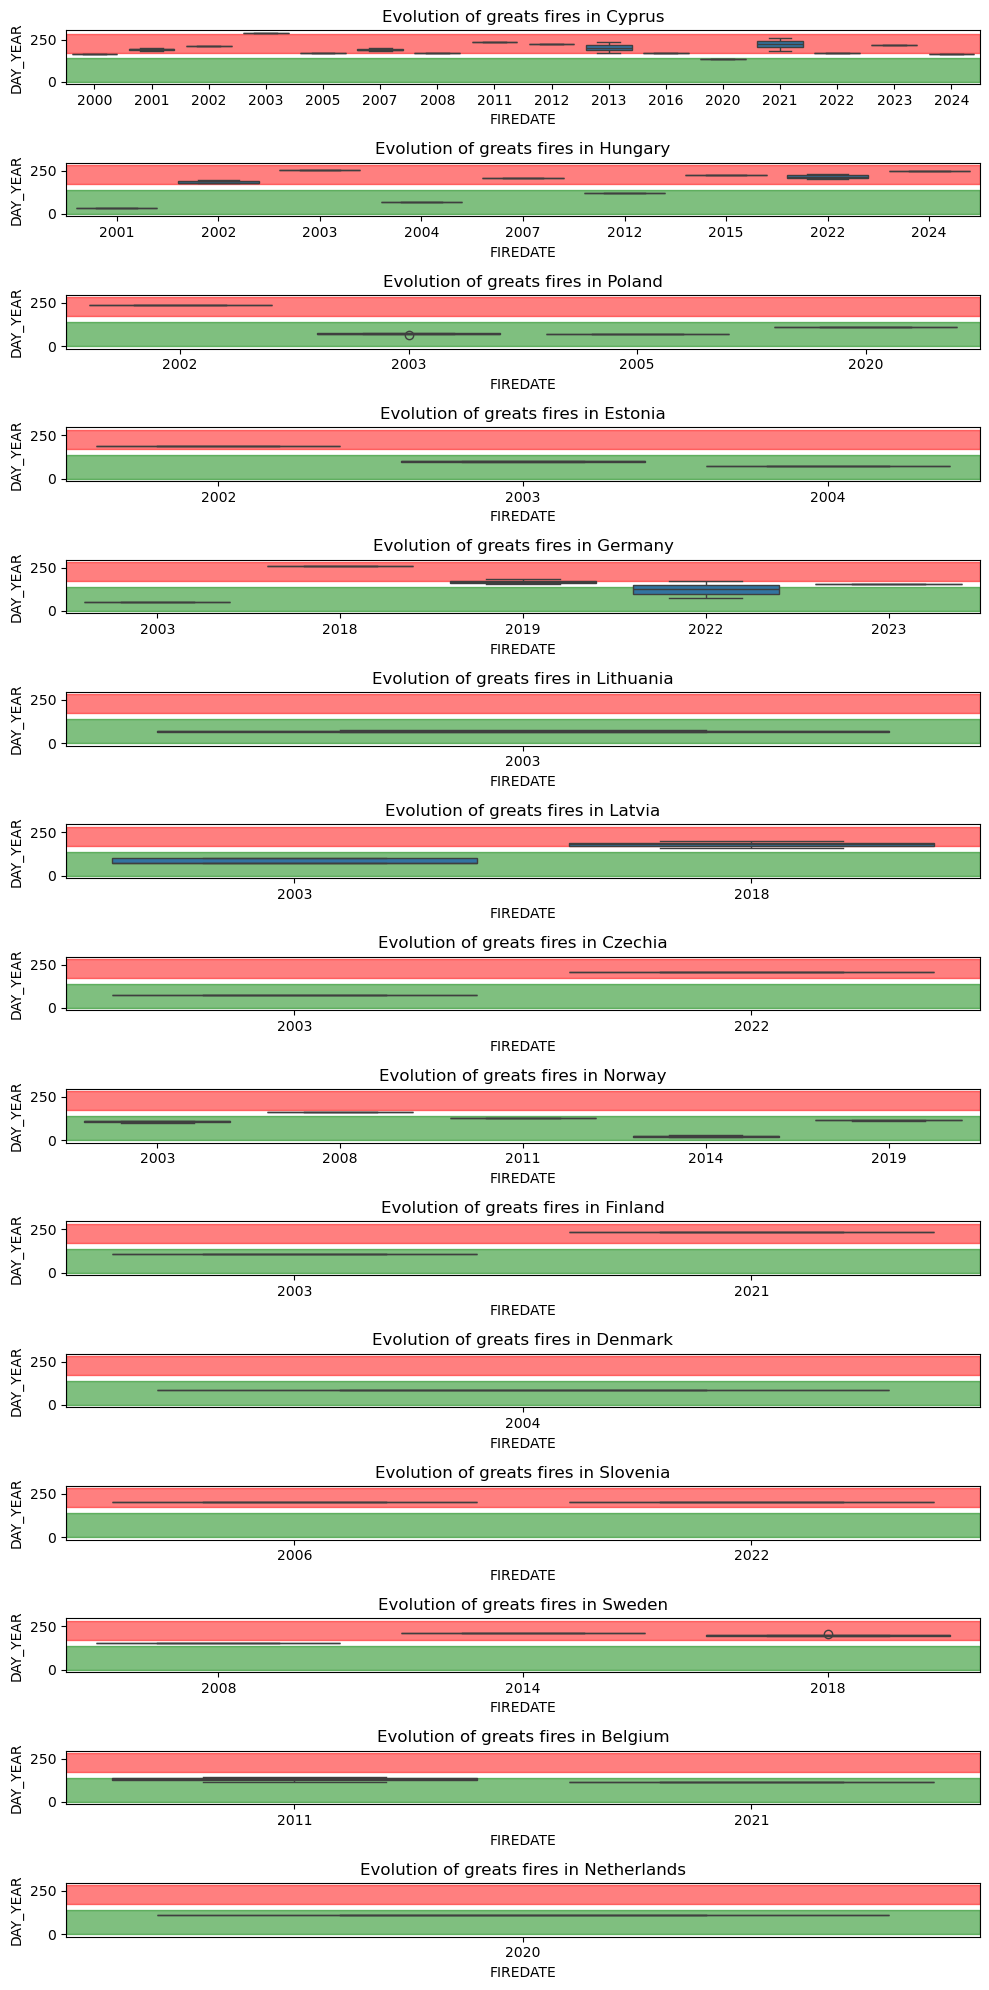

In [48]:
pinta_catbox(effis[effis.GIF_GROUP == 'Otros'], 'COUNTRY')

**BUSCANDO LOS MÁS GRANDES**  
En este apartado comprobaremos si hay alguna época predilecta, alguna zona y/o alguna tendencia relacionada con el área quemada

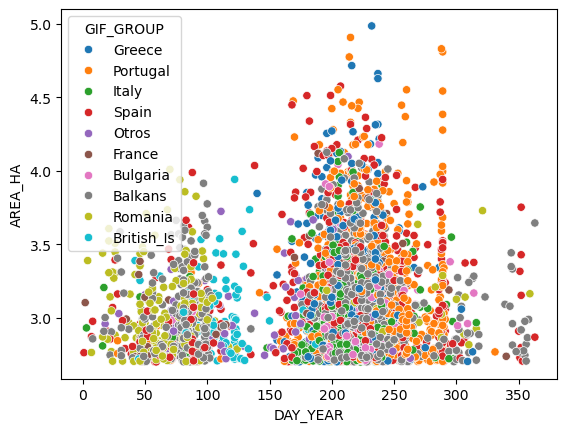

In [49]:
# Ahora comprobemos cuándo se producen los incendios más grandes
# Como se puede apreciar, no parece que haya relación con las fechas (más alá de lo obvio, en verano hay más incendios y más grandes)
# Sin embargo, sí se aprecian los dos períodos previamente definidos (más algunos outliers en diciembre)

sns.scatterplot(effis, x='DAY_YEAR', y=np.log10(effis.AREA_HA), hue='GIF_GROUP');

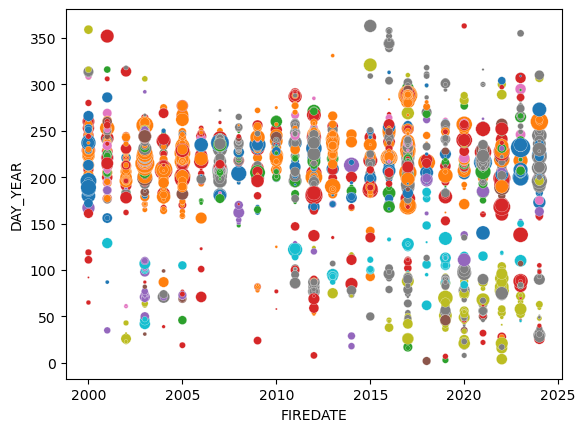

In [50]:
# De nuevo, comparemos la evolución de los grandes incendios en función de los días julianos y por grupo de países
# Volvemos a apreciar esa tendencia de incendios de primavera en Rumanía, Balcanes e Islas Británicas,
# aumentando además el tamaño de los mismos en estas zonas

sns.scatterplot(effis, y='DAY_YEAR', x=effis.FIREDATE.dt.year, size=np.log10(effis.AREA_HA),sizes=(2, 200), hue='GIF_GROUP', legend=False);

Ahora nos centraremos en el área quemada:
- Primero en la suma de las áreas, que aunque parece haber cierta tendencia al alza, realmente podrían asociarse a hechos aislados,  
como Portugal 2017 (Pedro Gao) y Grecia (2021 y 2023 con Alexandropolis) y España en 2022.
- Si observamos el tamaño medio de los grandes incendios, aunque parece que éstos se mantienen con el tiempo, salvando años puntuales (Rumania, España, Grecia),  
sí se observa una tendencia a hechos singulares, reflejado en un aumento paulatino de la media del área quemada  

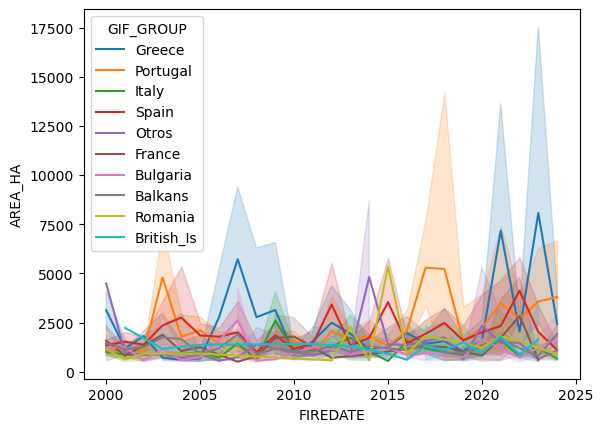

In [ ]:
sns.lineplot(effis, x=effis.FIREDATE.dt.year, y='AREA_HA', hue='GIF_GROUP');

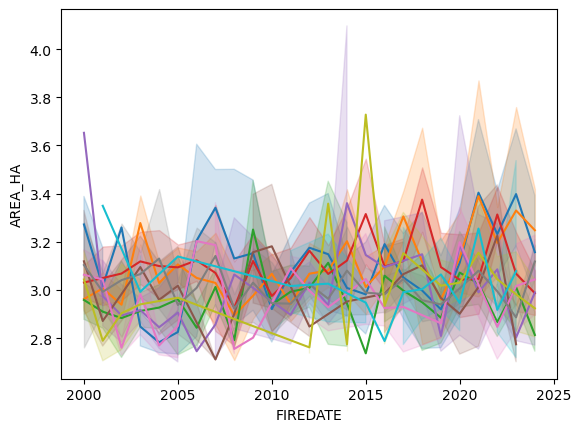

In [51]:
sns.lineplot(effis, x=effis.FIREDATE.dt.year, y=np.log10(effis.AREA_HA), hue='GIF_GROUP', legend=False);

In [56]:
median_size = effis.groupby(['GIF_GROUP',effis.FIREDATE.dt.year])['AREA_HA'].describe().reset_index()
median_size

,GIF_GROUP,FIREDATE,count,mean,std,min,25%,50%,75%,max
0,Balkans,2000,3.0,1447.333333,753.632094,578.0,1213.00,1848.0,1882.00,1916.0
1,Balkans,2001,30.0,1139.366667,763.342490,532.0,686.00,873.0,1261.00,4129.0
2,Balkans,2002,2.0,1264.000000,882.469263,640.0,952.00,1264.0,1576.00,1888.0
3,Balkans,2003,47.0,1749.744681,2088.359117,505.0,636.00,889.0,1456.50,10442.0
4,Balkans,2004,4.0,1663.750000,1355.153466,724.0,903.25,1133.0,1893.50,3665.0
...,...,...,...,...,...,...,...,...,...,...
213,Spain,2020,18.0,2015.388889,3789.721178,509.0,618.75,734.5,1503.25,16758.0
214,Spain,2021,22.0,2331.454545,4982.787064,525.0,600.25,812.5,1402.00,23078.0
215,Spain,2022,63.0,4121.746032,6275.104078,505.0,892.50,1645.0,3359.00,32528.0
216,Spain,2023,21.0,2031.904762,2909.860631,509.0,582.00,973.0,1448.00,10843.0


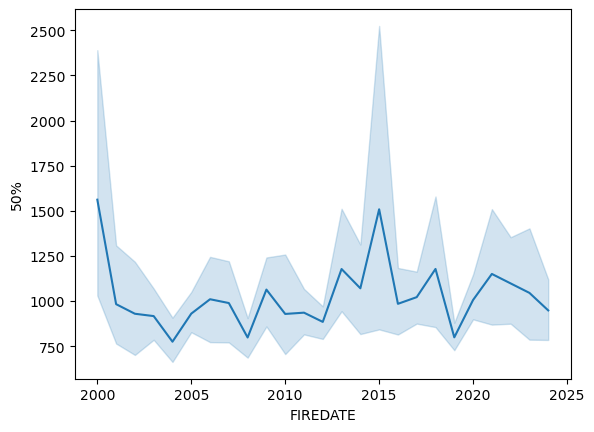

In [81]:
sns.lineplot(median_size, x='FIREDATE', y='50%');

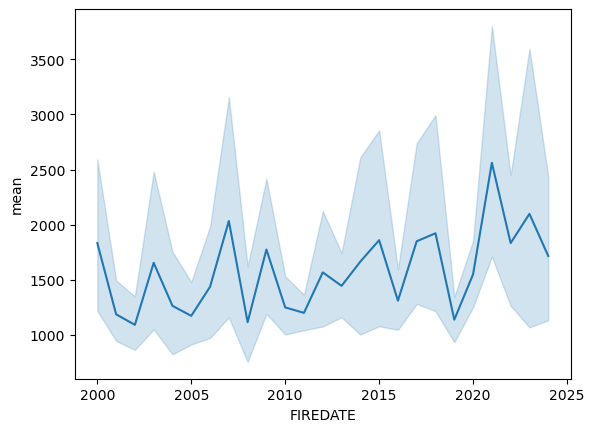

In [59]:
sns.lineplot(median_size, x='FIREDATE', y='mean');

Por último, vamos a comparar la media y mediana de los grandes incendios en Europa con las mayores superficies de cada país/grupo, esto es,  
vamos a ver los incendios más grandes por año y país, comprobando que pueden llegar a ser 10 veces más grandes que el tamaño medio (e incluso que Q3)

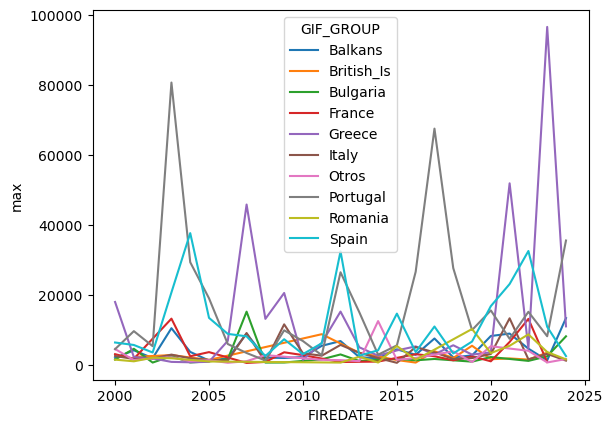

In [91]:
sns.lineplot(median_size, x='FIREDATE', y='max', hue='GIF_GROUP');

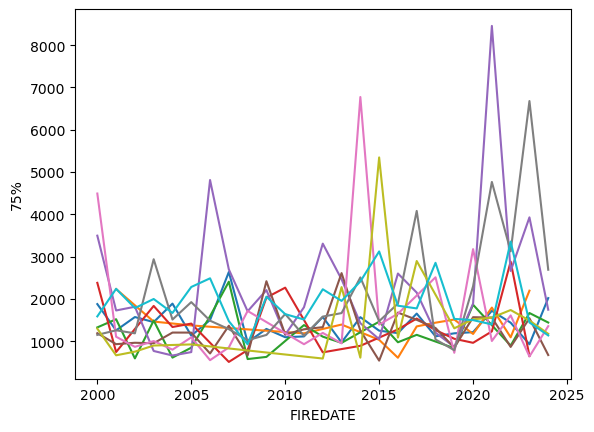

In [85]:
sns.lineplot(median_size, x='FIREDATE', y='75%', hue='GIF_GROUP', legend=False);

Por último un resumen de la evolución del tamaño de los grandes incendios y su número por país.


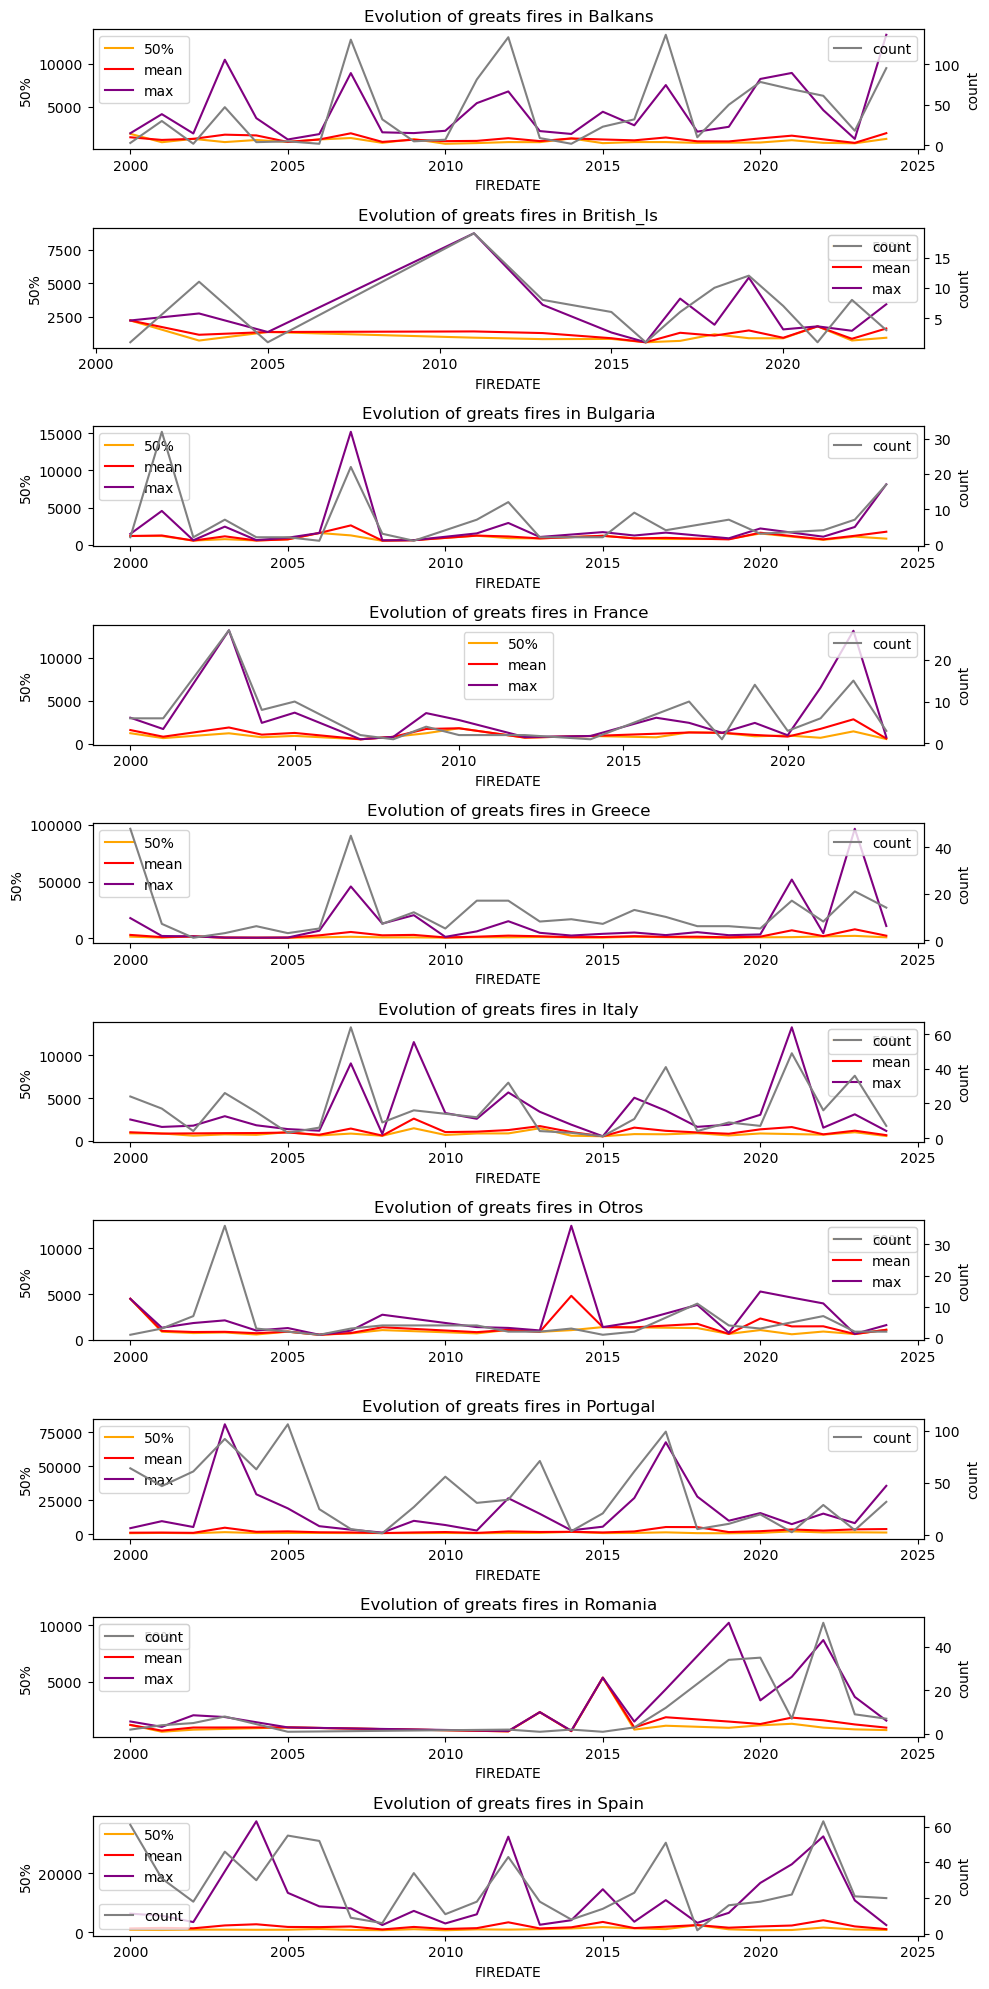

In [95]:
def pinta_catlines(df, cat, medida):
    variables = df[cat].unique()
    fig, axs = plt.subplots(len(variables),1, figsize=(10,20))

    for index, variable in enumerate(variables):
        filtro = df[df[cat] == variable]
        ax2 = axs[index].twinx()
        sns.lineplot(filtro, x='FIREDATE', y=medida[0], color='orange', ax=axs[index], label=medida[0])
        sns.lineplot(filtro, x='FIREDATE', y=medida[1], color='red',ax=axs[index], label=medida[1])
        sns.lineplot(filtro, x='FIREDATE', y=medida[2], color='purple',ax=axs[index], label=medida[2])
        sns.lineplot(filtro, x='FIREDATE', y=medida[3], color='grey',ax=ax2, label=medida[3])
        axs[index].set_title(f'Evolution of greats fires in {variable}')
        axs[index].legend()
    fig.tight_layout()

pinta_catlines(median_size, 'GIF_GROUP', ['50%','mean','max','count'])

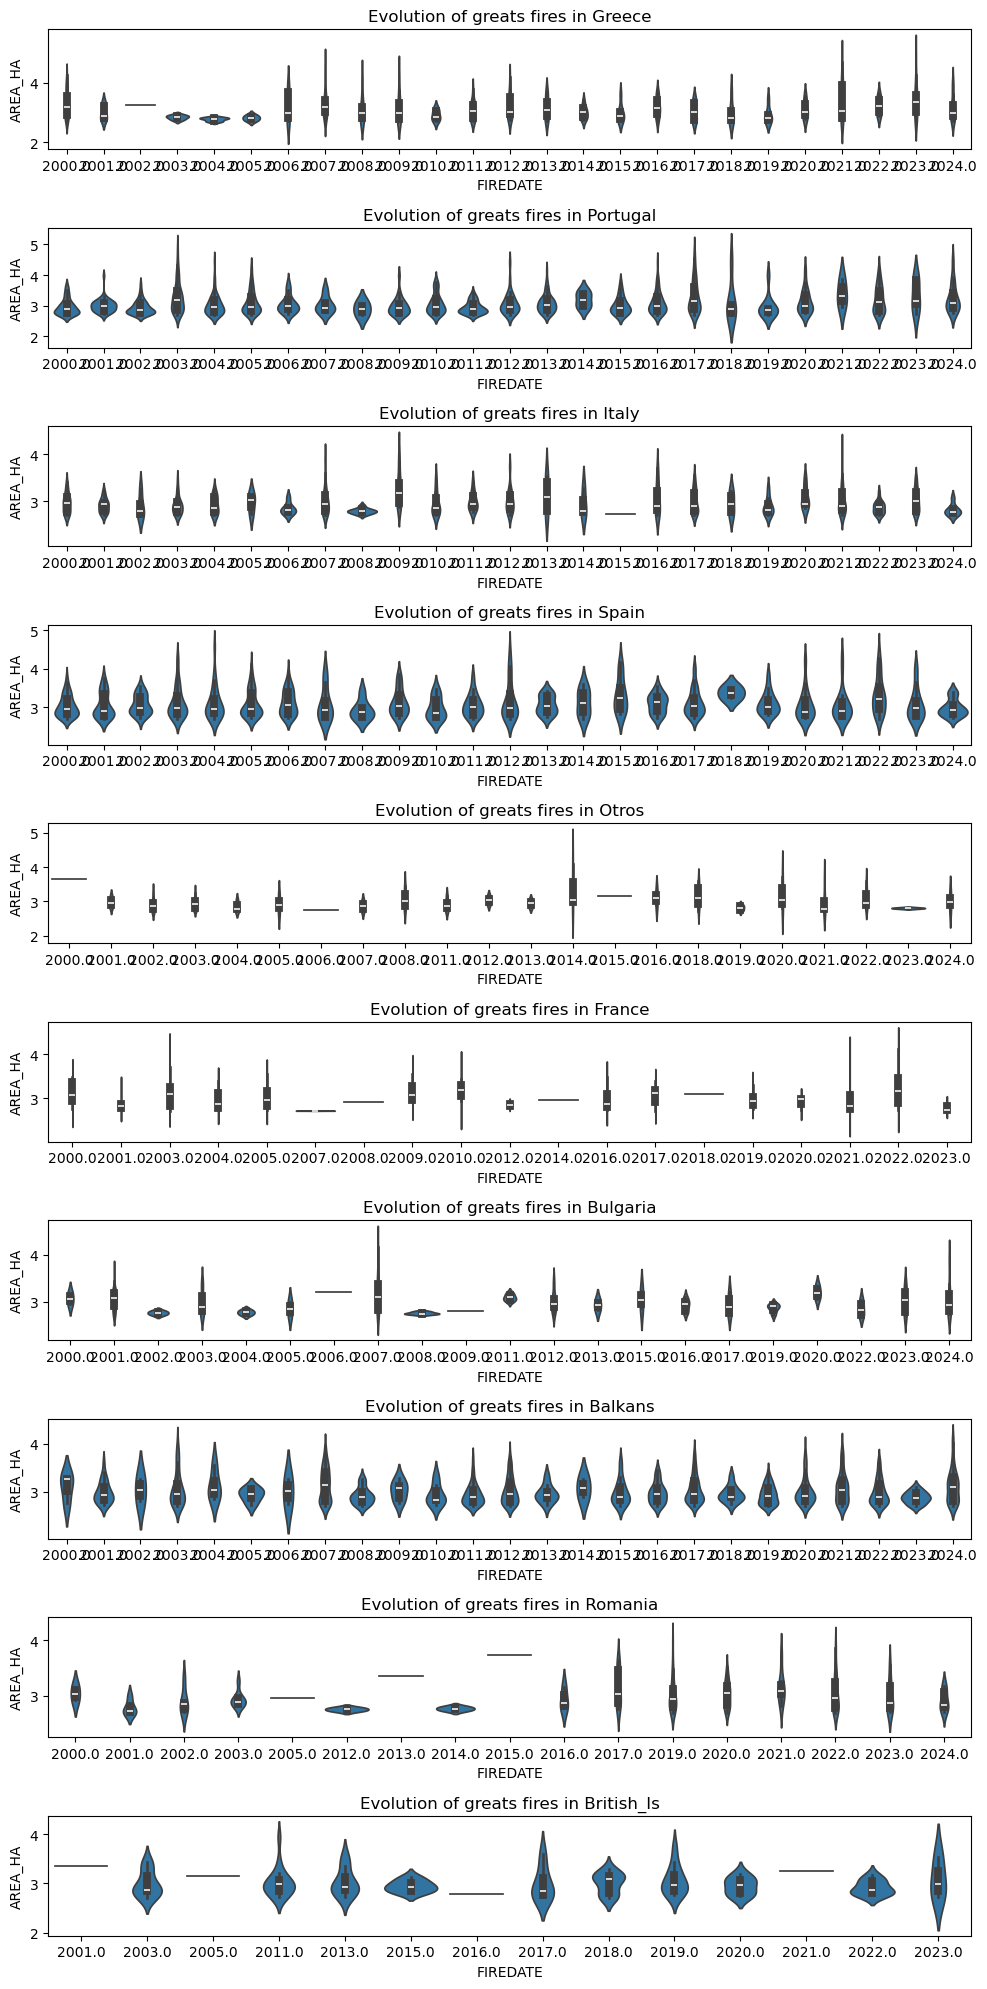

In [ ]:
def pinta_catviolin(df, cat):
    variables = df[cat].unique()
    fig, axs = plt.subplots(len(variables),1, figsize=(10,20))

    for index, variable in enumerate(variables):
        filtro = df[df[cat] == variable]
        sns.violinplot(filtro, x=filtro.FIREDATE.dt.year, y=np.log10(effis.AREA_HA), ax=axs[index])
        axs[index].set_title(f'Evolution of greats fires in {variable}')
    fig.tight_layout()

pinta_catviolin(effis, 'GIF_GROUP')

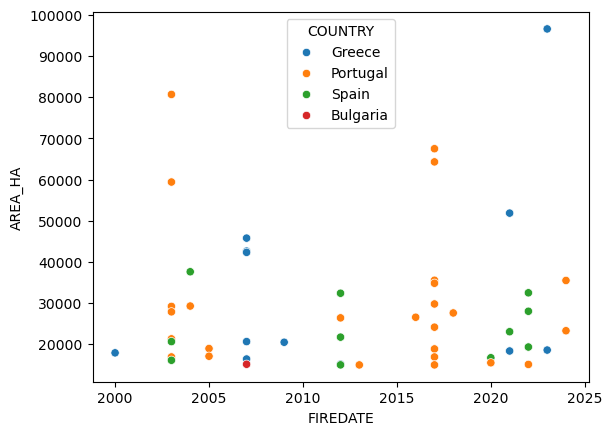

In [106]:
top50 = effis.nlargest(50,'AREA_HA')[['FIREDATE','AREA_HA','COUNTRY','PROVINCE']]

sns.scatterplot(top50, x=top50.FIREDATE.dt.year, y='AREA_HA', hue='COUNTRY');